# Scikit-Learn

In [146]:
import sklearn
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline # chain processing steps
from sklearn.model_selection import GridSearchCV


In [134]:
from sklearn.datasets import fetch_california_housing
fetch_california_housing()

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [135]:
X,y = fetch_california_housing(return_X_y=True)

In [136]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

In [141]:
# model object
mod = KNeighborsRegressor().fit(X, y)

pipe = Pipeline([
    ("scale", StandardScaler()),
    ("model", KNeighborsRegressor())
])

pipe.fit(X, y)
#pipe.get_params()

,steps,"[('scale', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30


In [142]:
pred = pipe.predict(X)

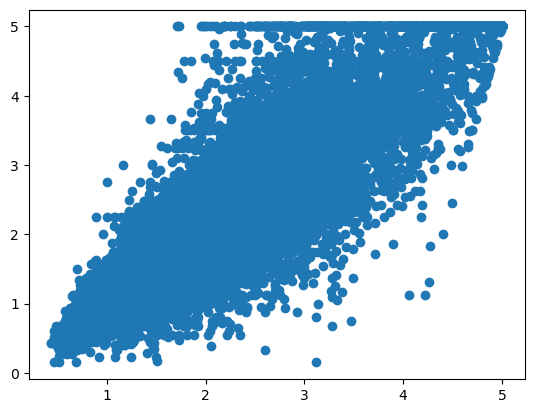

In [143]:
plt.scatter(pred, y)

In [151]:
mod = GridSearchCV(estimator=pipe,
            param_grid={'model__n_neighbors': [1,2,4,3,4,5,6,7,8,9,10]} , cv=3)

In [153]:
mod.fit(X,y);
pd.DataFrame(mod.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005954,0.004110,0.078732,0.009155,1,{'model__n_neighbors': 1},0.324068,0.334830,0.323371,0.327423,0.005245,11
1,0.002969,0.000056,0.081325,0.006631,2,{'model__n_neighbors': 2},0.468788,0.503457,0.424388,0.465544,0.032361,10
2,0.003068,0.000022,0.094044,0.006864,4,{'model__n_neighbors': 4},0.540323,0.564974,0.499827,0.535041,0.026857,7
3,0.003047,0.000047,0.088557,0.006473,3,{'model__n_neighbors': 3},0.518547,0.543340,0.473595,0.511827,0.028867,9
4,0.003015,0.000037,0.093784,0.006614,4,{'model__n_neighbors': 4},0.540323,0.564974,0.499827,0.535041,0.026857,7
5,0.003035,0.000044,0.098381,0.007199,5,{'model__n_neighbors': 5},0.551149,0.579313,0.511781,0.547414,0.027696,6
6,0.003055,0.000068,0.102164,0.007100,6,{'model__n_neighbors': 6},0.558435,0.586185,0.521134,0.555251,0.026652,5
7,0.003216,0.000046,0.107132,0.006909,7,{'model__n_neighbors': 7},0.564207,0.590509,0.525223,0.559979,0.026820,4
8,0.003149,0.000078,0.109442,0.007394,8,{'model__n_neighbors': 8},0.568637,0.593942,0.529337,0.563972,0.026580,3
9,0.003084,0.000023,0.111453,0.007150,9,{'model__n_neighbors': 9},0.571972,0.594863,0.529928,0.565588,0.026891,2
